In [0]:
%tensorflow_version 2.x
import tensorflow as tf
print(tf.__version__)

TensorFlow 2.x selected.
2.1.0-rc1


In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals
from google.colab import files
import numpy as np
import tensorflow_datasets as tfds
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import os
import io
from tensorflow import keras
from tensorflow.keras import layers
import keras.preprocessing.text
import tensorflow.keras.backend as K
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import multilabel_confusion_matrix as mcm
import tensorflow_hub as hub
tf.keras.backend.clear_session()
np.set_printoptions(precision=3, suppress=True)
pd.options.display.max_colwidth = 1000

Using TensorFlow backend.


In [0]:
print(tf.__version__)

2.1.0-rc1


In [0]:
contribution_1 = pd.read_csv('https://www.data.gouv.fr/fr/datasets/r/b687441f-bad7-451c-851c-122619f6fa6e')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
contribution_1.replace("?", np.nan, inplace = True)

In [0]:
import random 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
from sklearn.datasets.samples_generator import make_blobs 
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [0]:
np.random.seed(0)

In [0]:
df_questions_fermes= contribution_1.iloc[:,[14,12,17,18,22,23,26,28]]

In [0]:
df_questions_fermes= df_questions_fermes.fillna('ex nan')

In [0]:
df_questions_fermes.head()

,QUXVlc3Rpb246MjA0 - Estimez-vous avoir accès aux services publics dont vous avez besoin ?,"QUXVlc3Rpb246MTcw - Selon vous, l'Etat doit-il aujourd'hui transférer de nouvelles missions aux collectivités territoriales ?",QUXVlc3Rpb246MTc1 - Avez-vous déjà utilisé certaines de ces nouvelles formes de services publics ?,"QUXVlc3Rpb246MTc2 - Si oui, en avez-vous été satisfait ?","QUXVlc3Rpb246MTgw - Connaissez-vous le ""droit à l'erreur"", c'est-à-dire le droit d'affirmer votre bonne foi lorsque vous faites un erreur dans vos déclarations ?","QUXVlc3Rpb246MTgx - Si oui, avez-vous déjà utilisé ce droit à l'erreur ?",QUXVlc3Rpb246MTg0 - Faut-il donner plus d'autonomie aux fonctionnaires de terrain ?,QUXVlc3Rpb246MTg2 - Faut-il revoir le fonctionnement et la formation de l'administration ?
0,ex nan,ex nan,ex nan,ex nan,ex nan,ex nan,ex nan,ex nan
1,Oui,Non,Oui,Oui,Oui,Non,ex nan,ex nan
2,ex nan,ex nan,ex nan,ex nan,ex nan,ex nan,ex nan,ex nan
3,ex nan,Non,ex nan,ex nan,ex nan,ex nan,ex nan,ex nan
4,Oui,Non,Non,ex nan,Oui,Non,ex nan,Oui


In [0]:
import random 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
from sklearn.datasets.samples_generator import make_blobs 
%matplotlib inline

In [0]:
np.random.seed(0)

In [0]:
df_questions_fermes_dummies = pd.get_dummies(df_questions_fermes)

In [0]:
df_questions_fermes_dummies.head()

,QUXVlc3Rpb246MjA0 - Estimez-vous avoir accès aux services publics dont vous avez besoin ?_Non,QUXVlc3Rpb246MjA0 - Estimez-vous avoir accès aux services publics dont vous avez besoin ?_Oui,QUXVlc3Rpb246MjA0 - Estimez-vous avoir accès aux services publics dont vous avez besoin ?_ex nan,"QUXVlc3Rpb246MTcw - Selon vous, l'Etat doit-il aujourd'hui transférer de nouvelles missions aux collectivités territoriales ?_Non","QUXVlc3Rpb246MTcw - Selon vous, l'Etat doit-il aujourd'hui transférer de nouvelles missions aux collectivités territoriales ?_Oui","QUXVlc3Rpb246MTcw - Selon vous, l'Etat doit-il aujourd'hui transférer de nouvelles missions aux collectivités territoriales ?_ex nan",QUXVlc3Rpb246MTc1 - Avez-vous déjà utilisé certaines de ces nouvelles formes de services publics ?_Non,QUXVlc3Rpb246MTc1 - Avez-vous déjà utilisé certaines de ces nouvelles formes de services publics ?_Oui,QUXVlc3Rpb246MTc1 - Avez-vous déjà utilisé certaines de ces nouvelles formes de services publics ?_ex nan,"QUXVlc3Rpb246MTc2 - Si oui, en avez-vous été satisfait ?_Non","QUXVlc3Rpb246MTc2 - Si oui, en avez-vous été satisfait ?_Oui","QUXVlc3Rpb246MTc2 - Si oui, en avez-vous été satisfait ?_ex nan","QUXVlc3Rpb246MTgw - Connaissez-vous le ""droit à l'erreur"", c'est-à-dire le droit d'affirmer votre bonne foi lorsque vous faites un erreur dans vos déclarations ?_Non","QUXVlc3Rpb246MTgw - Connaissez-vous le ""droit à l'erreur"", c'est-à-dire le droit d'affirmer votre bonne foi lorsque vous faites un erreur dans vos déclarations ?_Oui","QUXVlc3Rpb246MTgw - Connaissez-vous le ""droit à l'erreur"", c'est-à-dire le droit d'affirmer votre bonne foi lorsque vous faites un erreur dans vos déclarations ?_ex nan","QUXVlc3Rpb246MTgx - Si oui, avez-vous déjà utilisé ce droit à l'erreur ?_Non","QUXVlc3Rpb246MTgx - Si oui, avez-vous déjà utilisé ce droit à l'erreur ?_Oui","QUXVlc3Rpb246MTgx - Si oui, avez-vous déjà utilisé ce droit à l'erreur ?_ex nan",QUXVlc3Rpb246MTg0 - Faut-il donner plus d'autonomie aux fonctionnaires de terrain ?_Non,QUXVlc3Rpb246MTg0 - Faut-il donner plus d'autonomie aux fonctionnaires de terrain ?_Oui,QUXVlc3Rpb246MTg0 - Faut-il donner plus d'autonomie aux fonctionnaires de terrain ?_ex nan,QUXVlc3Rpb246MTg2 - Faut-il revoir le fonctionnement et la formation de l'administration ?_Non,QUXVlc3Rpb246MTg2 - Faut-il revoir le fonctionnement et la formation de l'administration ?_Oui,QUXVlc3Rpb246MTg2 - Faut-il revoir le fonctionnement et la formation de l'administration ?_ex nan
0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1
1,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,1
2,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1
3,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1
4,0,1,0,1,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,1,0


In [0]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

In [0]:
principalComponents1 = pca.fit_transform(df_questions_fermes_dummies)
principalDf1 = pd.DataFrame(data = principalComponents1
             , columns = ['principal component 1', 'principal component 2'])

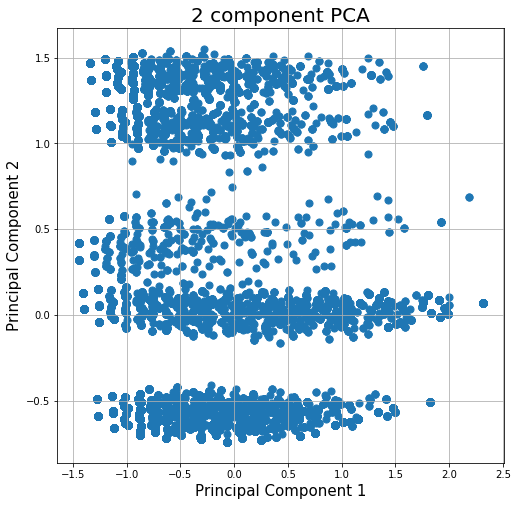

In [0]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
ax.scatter(principalDf1.loc[:, 'principal component 1']
               , principalDf1.loc[:, 'principal component 2']
               , s = 50)
ax.grid()

In [0]:
from sklearn.mixture import GaussianMixture

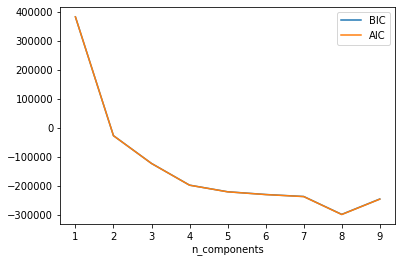

In [0]:
n_components = np.arange(1, 10)
models = [GaussianMixture(n, covariance_type='full', max_iter=1000, random_state=1, n_init=8).fit(principalDf1)
          for n in n_components]

plt.plot(n_components, [m.bic(principalDf1) for m in models], label='BIC')
plt.plot(n_components, [m.aic(principalDf1) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components');

In [0]:
modelGMM = GaussianMixture(n_components=4, max_iter=1000, random_state=1, n_init=12).fit(X=principalDf1)

In [0]:
GMM_labels = modelGMM.predict(principalDf1)

In [0]:
df_GMM_labels=pd.DataFrame(GMM_labels)
df_GMM_labels.columns = ['targets']

In [0]:
finalDf_GMM = pd.concat([principalDf1, df_GMM_labels], axis = 1)
finalDf_GMM

,principal component 1,principal component 2,targets
0,2.311855,0.067324,1
1,-0.268450,1.316928,2
2,2.311855,0.067324,1
3,1.911771,-0.012739,3
4,-0.757408,-0.635366,0
...,...,...,...
67296,-0.907791,0.422867,3
67297,2.311855,0.067324,1
67298,-0.703094,-0.513057,0
67299,-1.132746,-0.471881,0


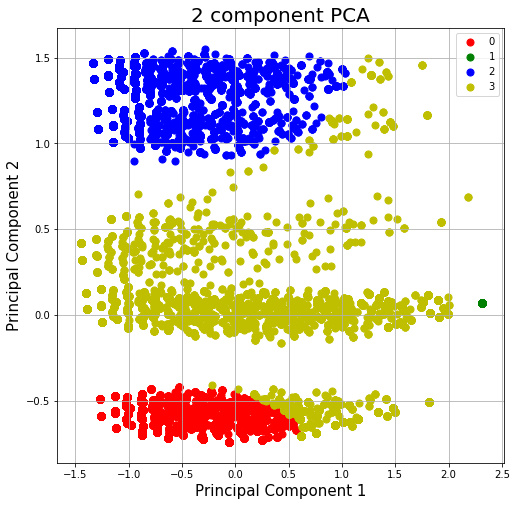

In [0]:
rng = np.random.RandomState(0)
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0, 1, 2,3]
colors = ['r', 'g', 'b','y']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf_GMM['targets'] == target
    ax.scatter(finalDf_GMM.loc[indicesToKeep, 'principal component 1']
               , finalDf_GMM.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [0]:
df_contrib_2 = contribution_1.drop(columns=['reference','createdAt','publishedAt','updatedAt','trashed','trashedStatus'])

In [0]:
cols = [14,12,17,18,22,23,26,28]
df_contrib_2 = df_contrib_2.drop(contribution_1.columns[cols],axis=1)

In [0]:
dataset0=[]
dataset1=[]
dataset2=[]
dataset3=[]
for i in range(len(df_questions_fermes)):
  if GMM_labels[i]==0:
    dataset0.append(df_contrib_2.iloc[i,:])
  if GMM_labels[i]==1:
    dataset1.append(df_contrib_2.iloc[i,:])
  if GMM_labels[i]==2:
    dataset2.append(df_contrib_2.iloc[i,:])
  if GMM_labels[i]==3:
    dataset3.append(df_contrib_2.iloc[i,:])

In [0]:
dataset0=pd.DataFrame(dataset0)
dataset1=pd.DataFrame(dataset1)
dataset2=pd.DataFrame(dataset2)
dataset3=pd.DataFrame(dataset3)

In [0]:
listedataframe=[]
listedataframe.append(dataset0)
listedataframe.append(dataset1)
listedataframe.append(dataset2)
listedataframe.append(dataset3)

In [0]:
print(len(dataset0))
print(len(dataset1))
print(len(dataset2))
print(len(dataset3))

31761
14577
13098
7865


###Zip Code

In [0]:
ZipCode0 = pd.DataFrame(dataset0.iloc[:,4]).apply(pd.Series.value_counts)

In [0]:
ZipCode1 = pd.DataFrame(dataset1.iloc[:,4]).apply(pd.Series.value_counts)

In [0]:
ZipCode2 = pd.DataFrame(dataset2.iloc[:,4]).apply(pd.Series.value_counts)

In [0]:
ZipCode3 = pd.DataFrame(dataset3.iloc[:,4]).apply(pd.Series.value_counts)

In [0]:
from time import time

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation

n_samples = 2000
n_features = 10000
n_components = 1
n_top_words = 20

import nltk
nltk.download('stopwords')
nltk.download('punkt')

from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords

stopWords = set(stopwords.words('french'))

from gensim.summarization.summarizer import summarize

from nltk.stem.snowball import FrenchStemmer
stemmer = FrenchStemmer()
from nltk.collocations import BigramAssocMeasures, BigramCollocationFinder
from math import log

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [0]:
finaldf = df_contrib_2.iloc[0:4,].copy()

In [0]:
cols = [0,2,3,4]
finaldf = finaldf.drop(finaldf.columns[cols],axis=1)

In [0]:
def bi_create(liste_text):
  result = []
  for i in range(len(liste_text)-1):
    result.append(liste_text[i]+ " " + liste_text[i+1] )
  return result

In [0]:
def bi_create_From_scored(scored): 
  liste = []
  for i in range(30):
    liste.append(scored[i][0][0] + " " + scored[i][0][1])
  return liste

In [0]:
def compteur_Word(dataset, index_column):
  data_samplesQ1 = pd.DataFrame(dataset.iloc[:,index_column])
  l1 = data_samplesQ1.isnull()
  mot = []
  for i in range(len(data_samplesQ1)):
    if (l1.iloc[i ,0] == False):
      mot.append(data_samplesQ1.iloc[i,0])
  for i in mot : 
    i = i.lower()
    for j in i.split() :
      if ((j not in stopWords) == True):
        j = stemmer.stem(j)

  #Extracting tf-idf features for NMF
  tfidf_vectorizer = TfidfVectorizer(max_df=0.8, min_df=0.1,max_features=n_features,stop_words=stopWords)
  tfidf = tfidf_vectorizer.fit_transform(mot)
  # Fit the NMF model
  tfidf_feature_names = tfidf_vectorizer.get_feature_names()

  compteur = pd.DataFrame({'nb': range(len(mot))})
  index = 0
  for i in mot : 
    nb = 0
    for j in i.split() :
      for k in tfidf_feature_names :
        if (j == k):
          nb = nb + 1
    compteur.iloc[index,0] = nb /log(len(i.split())+1)
    index = index + 1
  return compteur


In [0]:
def compteur_bigram(dataset, index_column):
  data_samplesQ1 = pd.DataFrame(dataset.iloc[:,index_column])
  l1 = data_samplesQ1.isnull()
  mot = []
  text = []
  for i in range(len(data_samplesQ1)):
    if (l1.iloc[i ,0] == False):
      mot.append(data_samplesQ1.iloc[i,0])
  for i in mot : 
    i = i.lower()
    for j in i.split() :
      if ((j not in stopWords) == True):
        j = stemmer.stem(j)
        text.append(j)
  finder = BigramCollocationFinder.from_words(text)
  bigram_measures = BigramAssocMeasures()
  scored = finder.score_ngrams(bigram_measures.raw_freq)
  liste_bi = bi_create_From_scored(scored)

  compteur = pd.DataFrame({'nb': range(len(mot))})
  index = 0
  for i in mot : 
    nb = 0
    for j in bi_create(i.split()) :
      for k in liste_bi :
        if (j == k):
          nb = nb + 1
    compteur.iloc[index,0] = nb /log(len(i.split())+1)
    index = index + 1
  return compteur

In [0]:
def Resumer_column(dataset, index_column,word_count):
  
  data_samplesQ1 = pd.DataFrame(dataset.iloc[:,index_column])
  l1 = data_samplesQ1.isnull()
  motFinal = []
  for i in range(len(data_samplesQ1)):
    if (l1.iloc[i ,0] == False):
      motFinal.append(data_samplesQ1.iloc[i,0])
  compteur = compteur_Word(dataset,index_column)+compteur_bigram(dataset,index_column)

  hh = compteur.sort_values(by=['nb'], ascending=False).head(10).index

  phrase = ""
  for i in hh :
    phrase = phrase +". "+ motFinal[i]

  return summarize(phrase, word_count = word_count)


In [0]:
for i in range(5,30):
  finaldf.iloc[0,i-4]=Resumer_column(dataset0, i,200)
  finaldf.iloc[1,i-4]=Resumer_column(dataset1, i,200)
  finaldf.iloc[2,i-4]=Resumer_column(dataset2, i,200)
  finaldf.iloc[3,i-4]=Resumer_column(dataset3, i,200)
  print(i)

In [0]:
finaldf

,title,QUXVlc3Rpb246MTY5 - Que pensez-vous de l'organisation de l'Etat et des administrations en France ? De quelle manière cette organisation devrait-elle évoluer ?,"QUXVlc3Rpb246MTcx - Si oui, lesquelles ?","QUXVlc3Rpb246MTcy - Si non, quels types de services publics vous manquent dans votre territoire et qu'il est nécessaire de renforcer ?",QUXVlc3Rpb246MTc0 - Quels nouveaux services ou quelles démarches souhaitez-vous voir développées sur Internet en priorité ?,QUXVlc3Rpb246MTc3 - Quelles améliorations préconiseriez-vous ?,"QUXVlc3Rpb246MTc4 - Quand vous pensez à l'évolution des services publics au cours des dernières années, quels sont ceux qui ont évolué de manière positive ?",QUXVlc3Rpb246MTc5 - Quels sont les services publics qui doivent le plus évoluer selon vous ?,"QUXVlc3Rpb246MTgy - Si oui, à quelle occasion en avez-vous fait usage ?",QUXVlc3Rpb246MTgz - Pouvez-vous identifier des règles que l'administration vous a déjà demandé d'appliquer et que vous avez jugées inutiles ou trop complexes ?,"QUXVlc3Rpb246MTg1 - Si oui, comment ?","QUXVlc3Rpb246MTg3 - Si oui, comment ?",QUXVlc3Rpb246MTg4 - Comment l'Etat et les collectivités territoriales peuvent-ils s'améliorer pour mieux répondre aux défis de nos territoires les plus en difficulté ?,"QUXVlc3Rpb246MTkx - Si vous avez été amené à chercher une formation, pouvez-vous indiquer les éléments de satisfaction et/ou les difficultés rencontrés en précisant, pour chaque point, l'administration concernée :","QUXVlc3Rpb246MTky - Si vous avez été amené à scolariser votre enfant, pouvez-vous indiquer les éléments de satisfaction et/ou les difficultés rencontrés en précisant, pour chaque point, l'administration concernée :","QUXVlc3Rpb246MTkz - Si vous avez été amené à chercher un emploi, pouvez-vous indiquer les éléments de satisfaction et/ou les difficultés rencontrés en précisant, pour chaque point, l'administration concernée :","QUXVlc3Rpb246MTk0 - Si vous avez été amené à préparer votre retraite, pouvez-vous indiquer les éléments de satisfaction et/ou les difficultés rencontrés en précisant, pour chaque point, l'administration concernée :","QUXVlc3Rpb246MTk1 - Si vous avez été amené à demander un remboursement de soins de santé, pouvez-vous indiquer les éléments de satisfaction et/ou les difficultés rencontrés en précisant, pour chaque point, l'administration concernée :","QUXVlc3Rpb246MTk2 - Si vous avez été amené à faire une demande d'aide pour une situation de handicap, pouvez-vous indiquer les éléments de satisfaction et/ou les difficultés rencontrés en précisant, pour chaque point, l'administration concernée :","QUXVlc3Rpb246MTk4 - Si vous avez été amené à créer une entreprise, pouvez-vous indiquer les éléments de satisfaction et/ou les difficultés rencontrés en précisant, pour chaque point, l'administration concernée :","QUXVlc3Rpb246MTk5 - Si vous avez été amené à recruter du personnel, pouvez-vous indiquer les éléments de satisfaction et/ou les difficultés rencontrés en précisant, pour chaque point, l'administration concernée :","QUXVlc3Rpb246MjAw - Si vous avez été amené à former du personnel, pouvez-vous indiquer les éléments de satisfaction et/ou les difficultés rencontrés en précisant, pour chaque point, l'administration concernée :","QUXVlc3Rpb246MjAx - Si vous avez été amené à rémunérer du personnel, pouvez-vous indiquer les éléments de satisfaction et/ou les difficultés rencontrés en précisant, pour chaque point, l'administration concernée :","QUXVlc3Rpb246MjAy - Si vous avez été amené à mettre fin à votre activité, pouvez-vous indiquer les éléments de satisfaction et/ou les difficultés rencontrés en précisant, pour chaque point, l'administration concernée :","QUXVlc3Rpb246MjAz - Si vous avez été amené à recruter une personne portant un handicap, pouvez-vous indiquer les éléments de satisfaction et/ou les difficultés rencontrés en précisant, pour chaque point, l'administration concernée :",QUXVlc3Rpb246MTg5 - Y a-t-il d'autres points sur l'organisation de l'Et